In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mat

In [2]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df.info()  # genel dataset hakkında bilgi almak için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df.describe()  # istatistiksel olarak numara içeren sütunların bir takım değerlerini verir

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [5]:
df.shape  # Datasetimizin satır ve sütun sayılarını verir

(1035, 6)

In [6]:
df["orbital_period"].min()  # indexlenen sütunların max min std gibi gibi pandas lirary fonksiyonlarına bakalım

0.09070629

In [7]:
df["orbital_period"].idxmin()  # argmin gibi düşünülebilir

945

In [8]:
df["orbital_period"].max()

730000.0

In [9]:
df["orbital_period"].std()

26014.72830406252

In [10]:
df.describe().T  # dataframe in transpozu yani 90 derece dönderilmesi için. .transpose() da aynısıdır.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [11]:
df.sum()

method            Radial VelocityRadial VelocityRadial VelocityR...
number                                                         1848
orbital_period                                       1986894.255326
mass                                                     1353.37638
distance                                                  213367.98
year                                                        2079388
dtype: object

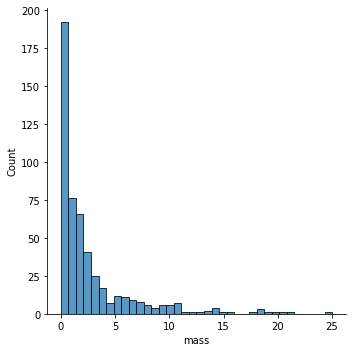

In [12]:
sns.displot(x="mass", data = df)

In [13]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [14]:
df.dropna(how = "all")  # silmedi çünkü her sütunu boş olan bir satır yok

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [15]:
df.dropna(how = "any")

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [16]:
df.corr()  # -1 ile 1 arası değişir. 0 olursa korelasyon yok. - lerde ise negatif + larda ise pozitif korelasyon vardır denilebilir.
# 1 ve -1 e yakın ise güçlü bir korelasyon vardır. Metamatikteki doğru ve ters orantı mantığı gibi düşünülebilir.

,number,orbital_period,mass,distance,year
number,1.000000,-0.012570,-0.241429,-0.033638,0.147849
orbital_period,-0.012570,1.000000,0.173725,-0.034365,-0.032333
mass,-0.241429,0.173725,1.000000,0.274082,-0.123787
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.147849,-0.032333,-0.123787,0.178922,1.000000


In [17]:
df[["mass", "distance"]].corr()  # sadece istenen indexlerde corr a bakmak

,mass,distance
mass,1.000000,0.274082
distance,0.274082,1.000000


In [18]:
df["method"].value_counts(dropna=False)  # Unique değerlerin sayısını getirir. none değerleri göstermiyor

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

## Groupby

In [19]:
df.groupby("method")["orbital_period"].mean()  # method grubunu orbital_period a göre grupla ve ortalamasını getir.

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [20]:
df.groupby("method")[["orbital_period"]].mean()  # iki tane [[]] yapınca dataframe olarak getirir ve görselliği daha güzeldir.

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4751.644444
Imaging,118247.737500
Microlensing,3153.571429
Orbital Brightness Modulation,0.709307
Pulsar Timing,7343.021201
Pulsation Timing Variations,1170.000000
Radial Velocity,823.354680
Transit,21.102073


In [21]:
# unique eşi benzeri olmayan kendine has olan değişkenlerdir. Unique de bunların kendilerini getirir.
df.year.unique()  # year sütununda unique olan değerlerin ne olduğu gelir

array([2006, 2008, 2011, 2007, 2009, 2002, 1996, 2010, 2001, 1995, 2004,
       2012, 2013, 2005, 2000, 2003, 1997, 1999, 2014, 1998, 1989, 1992,
       1994], dtype=int64)

In [22]:
df.year.nunique()  # bu da kaç tane unique değer olduğunu sayı olarak verir.

23

In [23]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
       'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
       'Sales':[200, 120, 340, 124, 243, 350]}

In [24]:
df1 = pd.DataFrame(data)
df1

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [25]:
df1.groupby("Company")["Sales"].mean()

Company
FB      296.5
GOOG    160.0
MSFT    232.0
Name: Sales, dtype: float64

In [26]:
df1.groupby("Company")[["Sales"]].mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [27]:
df1.groupby("Company")[["Sales"]].std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [28]:
df1.groupby("Company")[["Sales"]].describe().T

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [29]:
df1.groupby("Company")[["Sales"]].describe().T["GOOG"]

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

In [30]:
df2 = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df2.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    4 non-null      int64 
 1   col2    4 non-null      int64 
 2   col3    4 non-null      object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [32]:
df2.col2.unique()

array([444, 555, 666], dtype=int64)

In [33]:
df2.col2.nunique()

3

In [34]:
df2.col2.value_counts()

444    2
666    1
555    1
Name: col2, dtype: int64

In [35]:
df2

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [36]:
newdf = df2[(df2['col1']>2) & (df2['col2']==444)]
newdf

,col1,col2,col3
3,4,444,xyz


In [37]:
df2["col2"].sum()  # bu sütunun toplamı gelir. Neden axis belirtmedik, çünkü zaten sütunu indexledik :)

2109

In [38]:
del df2["col1"]  # del i çok kollanmıyoruz daha çok drop kullanılır. Del kalıcıdır bu arada.

In [39]:
df2

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [40]:
df2.columns

Index(['col2', 'col3'], dtype='object')

In [41]:
df2.index

RangeIndex(start=0, stop=4, step=1)

## Sorting
buradaki column ları sıralamak için kullanılır.

In [42]:
df2.sort_values(by = "col2")

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


In [43]:
df2.sort_values(by = "col2", ascending=False)

,col2,col3
2,666,ghi
1,555,def
0,444,abc
3,444,xyz


In [44]:
df2.sort_values(by = "col3", ascending=True)

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [45]:
df3 = pd.DataFrame({'col1':[1, 2, 3, np.nan],
                   'col2':[np.nan, 555, 666, 444],
                   'col3':['abc', 'def', 'ghi', 'xyz']})
df3.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [46]:
df3.dropna(how="all")  # any herhangi bir sütununda none varsa komple satırı drop eder.
# all eğer tüm sütunlar none ise o satırı drop et
# thresh parametrsi ile de kaç tane none değer olduğunu koşullayıp ona göre drop ederiz

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [47]:
df3.fillna("FILL")  # eğer df3[...] diye indexleme yapmazsak komple dataframe i oraya ne yazarsan onunla doldurur.

,col1,col2,col3
0,1.0,FILL,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,FILL,444.0,xyz


In [48]:
df3["col2"].fillna(df3.col2.mean())  # col2 yi col2 ortalaması ile doldur.

0    555.0
1    555.0
2    666.0
3    444.0
Name: col2, dtype: float64

In [49]:
df1

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


## Map & Replace

In [50]:
my_map = {"GOOG": "GOO", "MSFT": "MIC", "FB":"FACE"}

In [51]:
df1["Company"] = df1["Company"].map(my_map)
df1

,Company,Person,Sales
0,GOO,Sam,200
1,GOO,Charlie,120
2,MIC,Amy,340
3,MIC,Vanessa,124
4,FACE,Carl,243
5,FACE,Sarah,350


In [52]:
df1["Sales"] = df1["Sales"].map(lambda x: x * 1000)
df1

,Company,Person,Sales
0,GOO,Sam,200000
1,GOO,Charlie,120000
2,MIC,Amy,340000
3,MIC,Vanessa,124000
4,FACE,Carl,243000
5,FACE,Sarah,350000


In [53]:
df1["Company"] = df1["Company"].replace(to_replace="GOO", value = "GOOGLE")
df1

,Company,Person,Sales
0,GOOGLE,Sam,200000
1,GOOGLE,Charlie,120000
2,MIC,Amy,340000
3,MIC,Vanessa,124000
4,FACE,Carl,243000
5,FACE,Sarah,350000


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  6 non-null      object
 1   Person   6 non-null      object
 2   Sales    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [55]:
df1["Sales"] = df1["Sales"].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  6 non-null      object
 1   Person   6 non-null      object
 2   Sales    6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes


In [56]:
"clarusway"[:-3]

'clarus'

In [57]:
"200000"[:-3]

'200'

In [58]:
df1["Sales"] = df1["Sales"].map(lambda x: x[:-3])
df1

,Company,Person,Sales
0,GOOGLE,Sam,200
1,GOOGLE,Charlie,120
2,MIC,Amy,340
3,MIC,Vanessa,124
4,FACE,Carl,243
5,FACE,Sarah,350


In [59]:
df4 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10,23,33,22,11,99],
                   'var2': [100,253,333,262,111,969]})
df4

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [60]:
df4.groupby("groups").mean().T

groups,A,B,C
var1,16,17,66
var2,181,182,651


In [61]:
df4.groupby("groups").aggregate([np.min,np.median,np.max]).T

groups         A    B    C
var1 amin     10   11   33
     median   16   17   66
     amax     22   23   99
var2 amin    100  111  333
     median  181  182  651
     amax    262  253  969

In [62]:
df4.groupby("groups").agg({"var1":"mean", "var2":"max"})

,var1,var2
groups,,
A,16,262
B,17,253
C,66,969


## Apply

In [63]:
df4

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [64]:
df4.apply(np.sum).T  # sütun bazlı toplama yapıyoruz

groups    ABCABC
var1         198
var2        2028
dtype: object

In [65]:
"A" + "B"

'AB'

In [66]:
def clarus(x):
    return x * 2

In [67]:
df4["var1"] = df4["var1"].apply(clarus)
df4

,groups,var1,var2
0,A,20,100
1,B,46,253
2,C,66,333
3,A,44,262
4,B,22,111
5,C,198,969


## Pivot Table

In [68]:
titanic = sns.load_dataset("titanic")  # titanic datasetini getirelim
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
titanic.groupby('sex').survived.mean()  # cinsiyete göre hayatta kalanların ortalamalarını gruplandıralım

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [71]:
titanic.groupby(["sex", "class"])["survived"].mean() # cinsiyet ve class a göre göre hayatta kalanların ortalamalarını gruplandıralım

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

## Buradan sonrası bireysel alıştırmalar

In [74]:
df2 = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df2.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [75]:
df2.sort_values(by=["col2"])

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


In [78]:
df2.isnull().sum()

col1    0
col2    0
col3    0
dtype: int64

In [81]:
df2.loc[2,"col1"]

3

In [82]:
df3

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [84]:
df3.fillna(method="ffill")

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,3.0,444.0,xyz


In [85]:
df3.fillna(method="ffill")

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,3.0,444.0,xyz


In [89]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
       'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
       'Sales':[200, 120, 340, 124, 243, 350]}

In [90]:
df4 = pd.DataFrame(data)
df4

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [ ]:
my_map = {"GOOG": "GOO", "MSFT": "MIC", "FB":"FACE"}

In [92]:
df1

,Company,Person,Sales
0,GOOGLE,Sam,200
1,GOOGLE,Charlie,120
2,MIC,Amy,340
3,MIC,Vanessa,124
4,FACE,Carl,243
5,FACE,Sarah,350
